In [2]:
import dicom
import os
import numpy
from matplotlib import pyplot, cm
from matplotlib import pylab
from sklearn import datasets, neighbors, linear_model
from skimage.feature import greycomatrix, greycoprops

/Users/ilyas/anaconda/envs/KAMI/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [3]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = numpy.random.permutation(len(a))
    return a[p], b[p]

In [4]:
pathTrainNeg = "./fibrosis_patches_8/train/norm"
pathTrainPos = "./fibrosis_patches_8/train/path"
pathTestPos = "./fibrosis_patches_8/test/path"
pathTestNeg = "./fibrosis_patches_8/test/norm"
lstFilesTrainNeg = []
lstFilesTrainPos = []
lstFilesTestNeg = []
lstFilesTestPos = []
for dirName, subdirList, fileList in os.walk(pathTrainNeg):
    for filename in fileList:
        if ".dcm" in filename.lower():
            lstFilesTrainNeg.append(os.path.join(dirName,filename))
for dirName, subdirList, fileList in os.walk(pathTrainPos):
    for filename in fileList:
        if ".dcm" in filename.lower():
            lstFilesTrainPos.append(os.path.join(dirName,filename))
for dirName, subdirList, fileList in os.walk(pathTestPos):
    for filename in fileList:
        if ".dcm" in filename.lower():
            lstFilesTestPos.append(os.path.join(dirName,filename))
for dirName, subdirList, fileList in os.walk(pathTestNeg):
    for filename in fileList:
        if ".dcm" in filename.lower():
            lstFilesTestNeg.append(os.path.join(dirName,filename))

In [8]:
pos_train=[]
neg_train=[]
X_train=[]
y_train=[]
X_test=[]
y_test=[]
learn_num = 2000
train_num = 100

for idx,img in enumerate(lstFilesTrainNeg):
    temp = numpy.ravel(dicom.read_file(img).pixel_array)
    #temp = dicom.read_file(img).pixel_array
    X_train.append(temp)
    neg_train.append(temp)
    y_train.append(0)
    if idx>learn_num:
        break

for idx,img in enumerate(lstFilesTrainPos):
    temp = numpy.ravel(dicom.read_file(img).pixel_array)
    #temp = dicom.read_file(img).pixel_array
    X_train.append(temp)
    pos_train.append(temp)
    y_train.append(1)
    if idx>learn_num:
        break

(X_train, y_train) = unison_shuffled_copies(numpy.asarray(X_train), numpy.asarray(y_train))
for idx,img in enumerate(lstFilesTestNeg):
    temp = numpy.ravel(dicom.read_file(img).pixel_array)
    #temp = dicom.read_file(img).pixel_array
    X_test.append(temp)
    y_test.append(0)
    if idx>train_num:
        break
for idx,img in enumerate(lstFilesTestPos):
    temp = numpy.ravel(dicom.read_file(img).pixel_array)
    #temp = dicom.read_file(img).pixel_array
    X_test.append(temp)
    y_test.append(1)
    if idx>train_num:
        break


(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.80000000e+01,   5.60000000e+01,   1.99000000e+02,
          5.19000000e+02,   1.64800000e+03,   4.81000000e+03,
          1.05020000e+04,   1.84080000e+04,   2.62630000e+04,
          3.84660000e+04,   4.67380000e+04,   6.15810000e+04,
          8.57890000e+04,   1.06669000e+05,   1.27153000e+05,
          1.48279000e+05,   1.51406000e+05,   1.41968000e+05,
          1.54876000e+05,   1.56061000e+05,   1.72895000e+05,
          1.98227000e+05,   2.13540000e+05,   2.42330000e+05,
          2.81893000e+05,   2.97869000e+05,   3.02122000e+05,
          3.16108000e+05,   3.32401000e+05,   3.47504000e+05,
          3.37655000e+05,   3.18146000e+05,   2.82365000e+05,
          2.55781000e+05,   2.28862000e+05,   2.01525000e+05,
          1.74704000e+05,   1.52508000e+05,   1.31682000e+05,
        

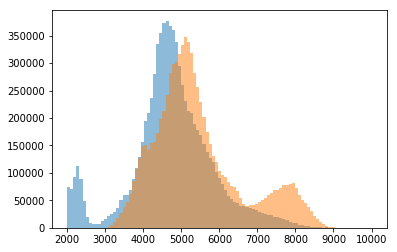

In [14]:
%matplotlib inline
flat_pos_list = [item for sublist in pos_train for item in sublist]
flat_neg_list = [item for sublist in neg_train for item in sublist]
bins = numpy.linspace(2000, 10000, 100)
pyplot.hist(flat_pos_list,bins,alpha=0.5)
pyplot.hist(flat_neg_list,bins,alpha=0.5)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   3.,   4.,   4.,  15.,  20.,  31.,  31.,
         34.,  25.,  20.,  21.,  17.,  27.,  27.,  26.,  46.,  42.,  53.,
         54.,  69.,  59.,  79.,  62.,  67.,  63.,  62.,  65.,  76.,  62.,
         63.,  80.,  58.,  54.,  36.,  35.,  30.,  37.,  23.,  16.,  10.,
          7.,   6.,   8.,   9.,  10.,   9.,   3.,   6.,   4.,   5.,   6.,
          3.,   7.,   3.,   8.,   4.,  11.,   4.,  11.,   9.,   8.,  13.,
         11.,  11.,  15.,  16.,  13.,  18.,  19.,  18.,  26.,  18.,  20.]),
 array([ 2000.        ,  2060.60606061,  2121.21212121,  2181.81818182,
         2242.42424242,  2303.03030303,  2363.63636364,  2424.24242424,
         2484.84848485,  2545.45454545,  2606.06060606,  2666.66666667,
         2727.27272727,  2787.87878788,  2848.48484848,  2909.09090909,
         2969.6969697 ,  3030.3030303 ,  309

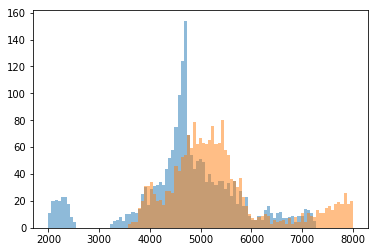

In [10]:
%matplotlib inline
avg_pos_val=[]
avg_neg_val=[]
for item in pos_train:
    avg_pos_val.append(numpy.mean(item))
for item in neg_train:
    avg_neg_val.append(numpy.mean(item))
bins = numpy.linspace(2000, 10000, 100)
pyplot.hist(avg_pos_val,bins,alpha=0.5)
pyplot.hist(avg_neg_val,bins,alpha=0.5)

In [13]:
knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.475490
LogisticRegression score: 0.485294
